# TAREA 1 INTERPOLACIÓN

In [2]:
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.use("Agg")

## 1.1 Elabórese un programa para calcular su polinomio ortogonal $P_n(x)$ usando las relaciones de recurrencia.

### Se tomarán los polinómios $J_0(x)$ y $J_1(x)$, donde ($J_i$) serán llamados los polinomios de Jacobi $P_i$
### $J_0(x)=1$
### $J_1(x)=\frac{1}{2}[\alpha-\beta+(\alpha+\beta+2)x]$
### y la relación de recurrencia
### $a_{1n}J_{n+1}=(a_{2n}+a_{3n}x)J_n(x)-a_{4n}J_{n-1}(x)$, como base para generar los demás polinomios; donde
### $a_{1n}=2(n+1)(n+\alpha+\beta+1)(2n+\alpha+\beta)$
### $a_{2n}=(2n+\alpha+\beta+1)(\alpha^2-\beta^2)$
### $a_{3n}=(2n+\alpha+\beta)_3 = \frac{\Gamma(2n+\alpha+\beta+3)}{\Gamma(2n+\alpha+\beta)}$
### $a_{4n}=2(n+\alpha)(n+\beta)(2n+\alpha+\beta+2)$
### y se tomará inicialmente por facilidad los valores de $\alpha=\beta=0$ pero estos valores se pueden cambiar facilmente en la casilla donde está definida la función JACOBI.

### Aqui se define la función factorial que se usará para calcular el coeficiente $a_{3n}$ dentro de la función JACOBI.
#### Para usar la función JACOBI se debe escribir JACOBI(n) donde n es el grado del polinomio que se desea encontrar.

In [3]:
def FAC(NUM):
    fac=1
    for i in range (1,NUM):
        fac=fac*(i+1)
    return fac

In [4]:
def JACOBI(n):
    global J
    global x
    if n==0:
        return 1
    else:
        if n<0:
            return "n debe ser mayor o igual a cero"
        else:
            J = range (0,n+1)
            x = symbols("x")
            alpha = 0 
            beta = 0
            J[0] = 1
            J[1] = 2*x
            a1n = 2*(n+1)*(n+alpha+beta+1)*(2*n+alpha+beta)
            a2n = (2*n+alpha+beta+1)*(alpha**2-beta**2)
            a3n = FAC(2*n+alpha+beta+2)/FAC(2*n+alpha+beta-1)
            a4n = 2*(n+alpha)*(n+beta)*(2*n+alpha+beta+2)
            for i in range (2,len(J)):
                J[i]=((a2n+a3n*x)*J[i-1]-a4n*J[i-2])/a1n
            return J[n]

In [5]:
JACOBI(8)

-17408*x**2/6561 + 1088*x*(17*x*(34*x**2/9 - 8/9)/9 - 16*x/9)/729 - 136*x*(-136*x*(34*x**2/9 - 8/9)/81 + 17*x*(-272*x**2/81 + 17*x*(17*x*(34*x**2/9 - 8/9)/9 - 16*x/9)/9 + 64/81)/9 + 128*x/81)/81 + 17*x*(1088*x*(34*x**2/9 - 8/9)/729 - 136*x*(-272*x**2/81 + 17*x*(17*x*(34*x**2/9 - 8/9)/9 - 16*x/9)/9 + 64/81)/81 + 17*x*(2176*x**2/729 - 136*x*(17*x*(34*x**2/9 - 8/9)/9 - 16*x/9)/81 + 17*x*(-136*x*(34*x**2/9 - 8/9)/81 + 17*x*(-272*x**2/81 + 17*x*(17*x*(34*x**2/9 - 8/9)/9 - 16*x/9)/9 + 64/81)/9 + 128*x/81)/9 - 512/729)/9 - 1024*x/729)/9 + 4096/6561

## 1.2 Dentro del intervalo de definición escójase ne = 11 nodos equidistantes xe (i), i = 1 a 11 y encuéntrese los valores delpolinomio en estos nodos ye(i), i = 1 a 11.

In [6]:
m1 = 11
h1=2./(m1-1)
X1=range(0,m1)
Y1=range(0,m1)
for i in range(0,m1):
    X1[i]=-1+i*h1
for j in range (0,len(X1)):
    Y1[j] = J[len(J)-1].subs({x:X1[j]})

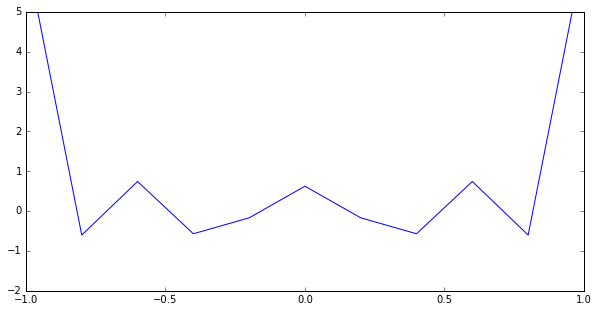

In [7]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot (X1,Y1)
plt.show()

## 1.3 Elabórese 3 programas para calcular los polinomios intepolantes en la base de algoritmos: Lagrange global; segmentarias lineal y parabólica.

# 1.3.1 LAGRANGE

In [8]:
l1 = range(0,len(X1))
for i in range(0,len(l1)):
    l1[i]= 1
    
for i in range (0,len(X1)):
    for j in range(0,len(X1)):
        if i!=j:
            l1[i]=l1[i]*((x-X1[j])/(X1[i]-X1[j]))

Px1 = 0
for i in range (0,len(l1)):
    Px1=Px1+(l1[i]*Y1[i])

In [9]:
Y2=range(0,m1)
for j in range (0,len(X1)):
    Y2[j]=Px1.subs({x:X1[j]})

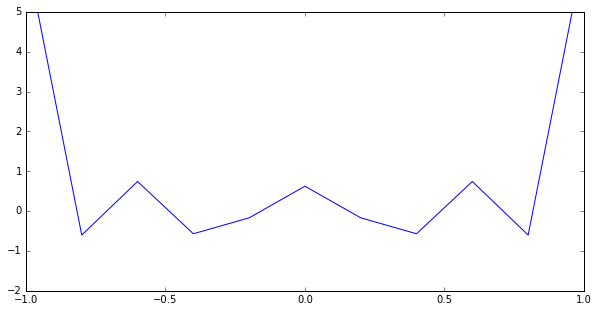

In [10]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X1,Y2)
plt.show()

# 1.3.2 LINEAL SEGMENTARIA

In [11]:
S1 = range(0,m1-1)
for i in range (0,len(S1)):
    S1[i] = Y1[i]+((Y1[i+1]-Y1[i])/(X1[i+1]-X1[i]))*(x-X1[i])

In [12]:
Y3 = range(0,m1)
Y3[m1-1] = S1[m1-2].subs({x:X1[m1-1]})
for i in range(0,len(S1)):
    for j in range(i,i+1):
        Y3[j] = S1[i].subs({x:X1[i]})

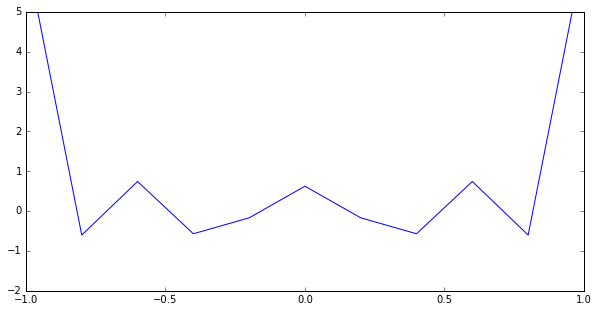

In [13]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X1,Y3)
plt.show()

# 1.3.3 CUADRÁTICA SEGMENTARIA

In [14]:
SC1 = range(0,m1-2)
for i in range (0,m1-2):
    SC1[i] =Y1[i]+((Y1[i+1]-Y1[i])/(X1[i+1]-X1[i]))*(x-X1[i])+(Y1[i+2]-2*Y1[i+1]+Y1[i])*(x-X1[i])*(x-X1[i+1])/(X1[i+1]-X1[i])**2

In [15]:
Y3C = range(0,m1)
Y3C[0] = SC1[0].subs({x:X1[0]})
Y3C[1] = SC1[0].subs({x:X1[1]})
Y3C[m1-1] = SC1[m1-3].subs({x:X1[m1-1]})
Y3C[m1-2] = SC1[m1-3].subs({x:X1[m1-2]})
for i in range(1,len(SC1)):
    Y3C[i+1] = SC1[i].subs({x:X1[i+1]})

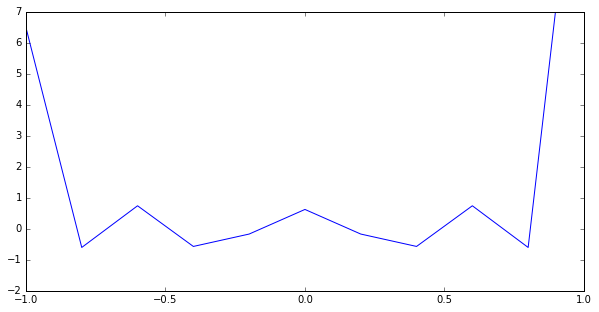

In [16]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 7])
plt.plot(X1,Y3C)
plt.show()

## 1.4 Dentro del intervalo de definición escójase n=200 nodos equidistantes x(i), i=1 a i=200 y encuéntrese los valores del polinomio en estos nodos y (i), i=1 a i=200 mediante de 3 funciones intepolantes y compárese los resultados con los valores exactos.

# 1.4.1 LAGRANGE

In [17]:
m2 = 200
h2=2./(m2-1)
X2=range(0,m2)
Y4=range(0,m2)
for i in range(0,m2):
    X2[i]=-1+i*h2
for j in range (0,len(X2)):
    Y4[j]=Px1.subs({x:X2[j]})

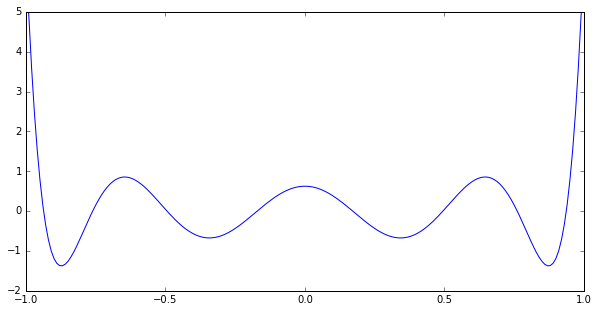

In [18]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y4)
plt.show()

# 1.4.2 LINEAL SEGMENTARIA

In [19]:
Y5=range(0,m2)
for j in range(0,len(Y5)):
    Y5[j] = J[len(J)-1].subs({x:X2[j]})

In [20]:
S2 = range(0,m2-1)
for i in range (0,len(S2)):
    S2[i] = Y5[i]+((Y5[i+1]-Y5[i])/(X2[i+1]-X2[i]))*(x-X2[i])

In [21]:
Y6 = range(0,m2)
Y6[m2-1] = S2[m2-2].subs({x:X2[m2-1]})
for i in range(0,len(S2)):
    for j in range(i,i+1):
        Y6[j] = S2[i].subs({x:X2[i]})

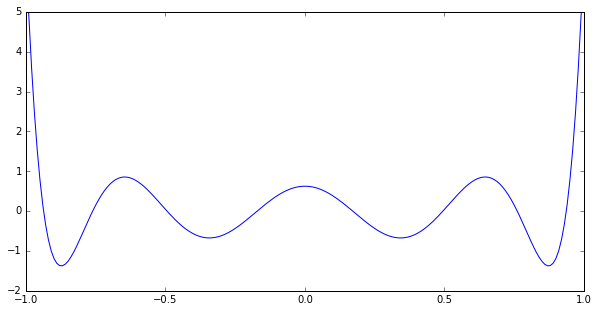

In [22]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y6)
plt.show()

# 1.4.3 CUADRÁTICA SEGMENTARIA


In [23]:
SC2 = range(0,m2-2)
for i in range (0,len(SC2)):
    SC2[i] =Y5[i]+((Y5[i+1]-Y5[i])/(X2[i+1]-X2[i]))*(x-X2[i])+(Y5[i+2]-2*Y5[i+1]+Y5[i])*(x-X2[i])*(x-X2[i+1])/(X2[i+1]-X2[i])**2

In [24]:
Y6C = range(0,m2)
Y6C[0] = SC2[0].subs({x:X2[0]})
Y6C[1] = SC2[0].subs({x:X2[1]})
Y6C[m2-2] = SC2[m2-3].subs({x:X2[m2-3]})
Y6C[m2-3] = SC2[m2-3].subs({x:X2[m2-3]})
for i in range(1,len(SC2)):
    Y6C[i+1] = SC2[i].subs({x:X2[i+1]})

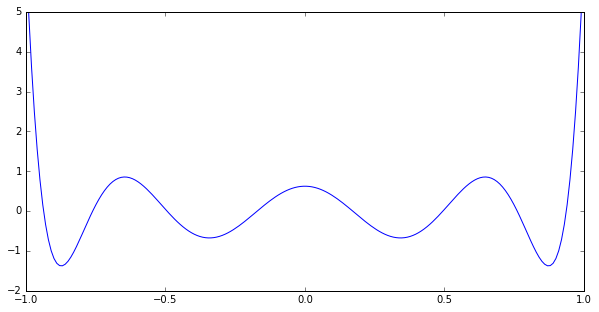

In [25]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y6C)
plt.show()

## valores exactos del polinomio de Jacobi

In [26]:
YJ=range(0,m2)
for i in range (0,len(X2)):
    YJ[i]=J[len(J)-1].subs({x:X2[i]})

## Comparación con Lagrange
Se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [50]:
A=range(0,m2)
for i in range (0,m2):
    A[i]=YJ[i]-Y4[i]
epl=0
for j in range (0,len(A)):
    epl=epl+A[j]
epl=epl/len(A)
epl,A

(5.08308672930724e-16,
 [0,
  6.21724893790088e-15,
  1.50990331349021e-14,
  1.06581410364015e-14,
  2.22044604925031e-15,
  5.55111512312578e-16,
  -5.21804821573824e-15,
  5.88418203051333e-15,
  1.44328993201270e-15,
  1.11022302462516e-16,
  3.55271367880050e-15,
  -1.55431223447522e-15,
  0,
  -2.22044604925031e-15,
  8.65973959207622e-15,
  -3.10862446895044e-15,
  -2.22044604925031e-16,
  -1.99840144432528e-15,
  -1.11022302462516e-15,
  4.77395900588817e-15,
  2.44249065417534e-15,
  -6.66133814775094e-16,
  1.94289029309402e-15,
  1.34614541735800e-15,
  -8.74300631892311e-16,
  -1.33226762955019e-15,
  -2.77555756156289e-16,
  -8.32667268468867e-16,
  0,
  3.33066907387547e-16,
  -6.66133814775094e-16,
  -4.44089209850063e-16,
  -8.88178419700125e-16,
  -6.66133814775094e-16,
  -1.11022302462516e-15,
  2.22044604925031e-16,
  -2.22044604925031e-16,
  -7.77156117237610e-16,
  3.33066907387547e-16,
  -1.22124532708767e-15,
  -5.55111512312578e-16,
  -6.66133814775094e-16,
  -7

## Comparación con spline lineal
Se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [51]:
B=range(0,m2)
for i in range (0,m2):
    B[i]=YJ[i]-Y6[i]
eps=0
for j in range (0,len(A)):
    eps=eps+B[j]
eps=eps/len(B)
eps,B

(7.68829444552921e-17,
 [-1.42108547152020e-14,
  0,
  7.10542735760100e-15,
  -8.88178419700125e-16,
  1.33226762955019e-15,
  2.66453525910038e-15,
  3.55271367880050e-15,
  -8.88178419700125e-16,
  4.44089209850063e-16,
  8.88178419700125e-16,
  -8.88178419700125e-16,
  0,
  0,
  0,
  2.22044604925031e-16,
  0,
  -8.88178419700125e-16,
  -2.22044604925031e-16,
  0,
  -2.22044604925031e-16,
  6.66133814775094e-16,
  4.44089209850063e-16,
  5.55111512312578e-16,
  -6.66133814775094e-16,
  4.44089209850063e-16,
  7.77156117237610e-16,
  3.33066907387547e-16,
  -1.11022302462516e-16,
  3.33066907387547e-16,
  -3.33066907387547e-16,
  0,
  -4.44089209850063e-16,
  2.22044604925031e-16,
  0,
  0,
  -1.11022302462516e-16,
  0,
  0,
  0,
  1.11022302462516e-16,
  0,
  -1.11022302462516e-16,
  -1.11022302462516e-16,
  2.22044604925031e-16,
  -2.22044604925031e-16,
  1.11022302462516e-16,
  -1.11022302462516e-16,
  1.11022302462516e-16,
  1.11022302462516e-16,
  1.11022302462516e-16,
  1.1102

## Comparación con spline cuadrático
Se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [52]:
BC=range(0,m2)
for i in range (0,m2):
    BC[i]=YJ[i]-Y6C[i]
eps=0
for j in range (0,len(A)):
    eps=eps+BC[j]
eps=eps/len(BC)
eps,BC

(-0.962538495440802,
 [-1.42108547152020e-14,
  -2.84217094304040e-14,
  7.10542735760100e-15,
  1.33226762955019e-14,
  1.33226762955019e-15,
  2.66453525910038e-15,
  3.55271367880050e-15,
  -8.88178419700125e-16,
  3.99680288865056e-15,
  8.88178419700125e-16,
  8.88178419700125e-16,
  -8.88178419700125e-16,
  -4.44089209850063e-16,
  0,
  -2.22044604925031e-16,
  0,
  0,
  -2.22044604925031e-16,
  0,
  -2.22044604925031e-16,
  6.66133814775094e-16,
  4.44089209850063e-16,
  -1.22124532708767e-15,
  -6.66133814775094e-16,
  -1.33226762955019e-15,
  7.77156117237610e-16,
  3.33066907387547e-16,
  -1.11022302462516e-16,
  -5.55111512312578e-16,
  5.55111512312578e-16,
  -8.88178419700125e-16,
  4.44089209850063e-16,
  -2.22044604925031e-16,
  2.22044604925031e-16,
  0,
  0,
  0,
  0,
  0,
  -3.33066907387547e-16,
  0,
  -1.11022302462516e-16,
  -1.11022302462516e-16,
  -2.22044604925031e-16,
  2.22044604925031e-16,
  1.11022302462516e-16,
  -1.11022302462516e-16,
  1.11022302462516e-1

# 1.5. Introduzca los errores aleatorios de 1%en los valores del polinomio ye (i) = ye (i) + 0.01* random, i = 1 a i = 11 y con estos nuevos valores realícese la tarea 1.4

In [53]:
E0=0.1
E=E0*np.random.rand(len(X1))

Ye=range(0,len(Y1))
for i in range(0,len(Ye)):
    Ye[i]=Y1[i]+E[i]

## 1.5.1 se construye de nuevo el interpolador de Lagrange para estos nuevos valores del polinomio de Jacobi con error del 1%

In [54]:
l2 = range(0,len(X1))
for i in range(0,len(l2)):
    l2[i]= 1
    
for i in range (0,len(X1)):
    for j in range(0,len(X1)):
        if i!=j:
            l2[i]=l2[i]*((x-X1[j])/(X1[i]-X1[j]))

Px2 = 0
for i in range (0,len(l2)):
    Px2=Px2+(l2[i]*Ye[i])

In [55]:
Y4e=range(0,m2)
for j in range (0,len(X2)):
    Y4e[j]=Px2.subs({x:X2[j]})

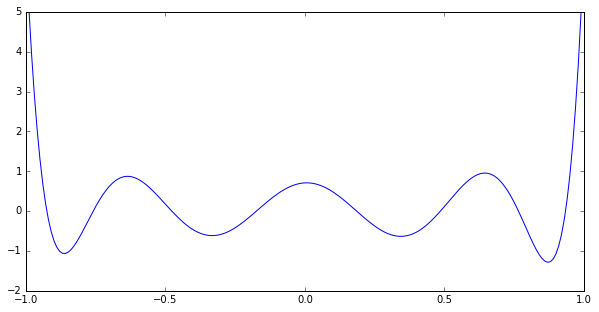

In [56]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y4e)
plt.show()

## 1.5.2 se construye de nuevo el interpolador segmentario lineal para estos nuevos valores del polinomio de Jacobi con error del 1%

In [34]:
E0=0.1
E=E0*np.random.rand(len(X2))

Ye2=range(0,len(YJ))
for i in range(0,len(Ye2)):
    Ye2[i]=YJ[i]+E[i]

In [35]:
S3 = range(0,m2-1)
for i in range (0,len(S3)):
    S3[i] = Ye2[i]+((Ye2[i+1]-Ye2[i])/(X2[i+1]-X2[i]))*(x-X2[i])

In [36]:
Y6e = range(0,m2)
Y6e[m2-1] = S3[m2-2].subs({x:X2[m2-1]})
for i in range(0,len(S3)):
    for j in range(i,i+1):
        Y6e[j] = S3[i].subs({x:X2[i]})

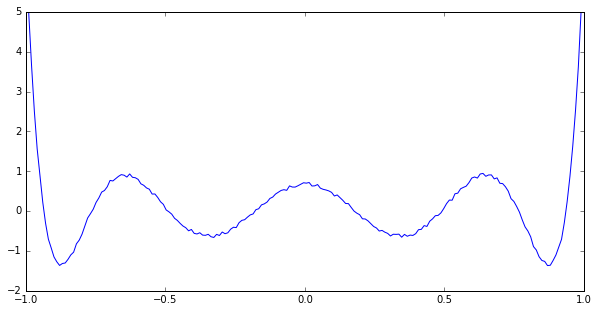

In [37]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y6e)
plt.show()

## 1.5.3 se construye de nuevo el interpolador segmentario cuadrático para estos nuevos valores del polinomio de Jacobi con error del 1%

In [38]:
SC3 = range(0,m2-2)
for i in range (0,len(SC3)):
    SC3[i] =Ye2[i]+((Ye2[i+1]-Ye2[i])/(X2[i+1]-X2[i]))*(x-X2[i])+(Ye2[i+2]-2*Ye2[i+1]+Ye2[i])*(x-X2[i])*(x-X2[i+1])/(X2[i+1]-X2[i])**2

In [39]:
Y6Ce = range(0,m2)
Y6Ce[0] = SC3[0].subs({x:X2[0]})
Y6Ce[1] = SC3[0].subs({x:X2[1]})
Y6Ce[m2-2] = SC3[m2-3].subs({x:X2[m2-3]})
Y6Ce[m2-3] = SC3[m2-3].subs({x:X2[m2-3]})
for i in range(1,len(SC2)):
    Y6Ce[i+1] = SC3[i].subs({x:X2[i+1]})

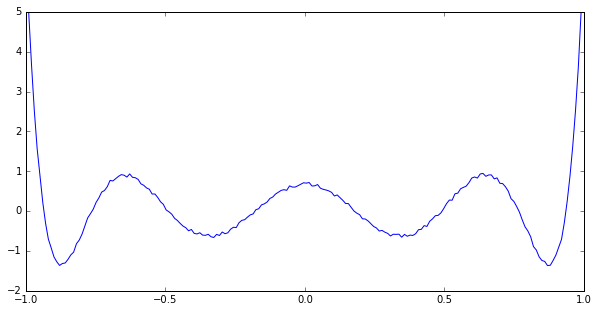

In [40]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -2, 5])
plt.plot(X2,Y6Ce)
plt.show()

## Comparación con Lagrange
Se comparan los valores exactos del polinomio de Jacobi con los valores de la interpolacion de lagrange con errores aleatorios del 1% y se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [41]:
Ae=range(0,m2)
for i in range (0,m2):
    Ae[i]=YJ[i]-Y4e[i]
epl=0
for j in range (0,len(A)):
    epl=epl+Ae[j]
epl=epl/len(Ae)
epl,Ae

(-0.0543589283665717,
 [-0.0754670810622295,
  -0.114168374101181,
  -0.142844227119189,
  -0.163073832205035,
  -0.176259848500317,
  -0.183643061309317,
  -0.186316127588345,
  -0.185236449864082,
  -0.181238219268510,
  -0.175043667043208,
  -0.167273562559842,
  -0.158456994623835,
  -0.149040471576351,
  -0.139396374484512,
  -0.129830796510713,
  -0.120590800379869,
  -0.111871124716435,
  -0.103820368903077,
  -0.0965466850168050,
  -0.0901230043290053,
  -0.0845918248103095,
  -0.0799695850607967,
  -0.0762506490900498,
  -0.0734109253993778,
  -0.0714111428703416,
  -0.0701998050391421,
  -0.0697158434349262,
  -0.0698909897817057,
  -0.0706518860078774,
  -0.0719219501741571,
  -0.0736230156195873,
  -0.0756767598362020,
  -0.0780059388153566,
  -0.0805354418625303,
  -0.0831931811523484,
  -0.0859108295912163,
  -0.0886244198712229,
  -0.0912748169354071,
  -0.0938080754309852,
  -0.0961756931032746,
  -0.0983347704786213,
  -0.100248086599474,
  -0.101884100008283,
  -0.103

## Comparación con spline lineal
Se comparan los valores exactos del polinomio de Jacobi con los valores de la interpolacion lineal con errores aleatorios del 1% y se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [42]:
Be=range(0,m2)
for i in range (0,m2):
    Be[i]=YJ[i]-Y6e[i]
eps=0
for j in range (0,len(Be)):
    eps=eps+Be[j]
eps=eps/len(Be)
eps,Be

(-0.0487974580924449,
 [-0.0638552914231099,
  -0.0235244318779593,
  -0.0452296873076463,
  -0.0175899706206346,
  -0.0122802758083425,
  -0.0980461794453165,
  -0.0617786284070085,
  -0.0291972282361721,
  -0.00958815857549267,
  -0.0724820719340959,
  -0.0390960841111889,
  -0.0384555563134272,
  -0.00400277630689816,
  -0.0577422801282612,
  -0.0314140225978654,
  -0.0485224607249739,
  -0.0574918628590417,
  -0.00171090679169184,
  -0.0713486176215525,
  -0.0141567589533838,
  -0.00700749016345026,
  -0.0507476916002214,
  -0.0968912451229252,
  -0.0513241652959013,
  -0.0192160379457120,
  -0.0495846776280181,
  -0.0361986501225818,
  -0.0663999503569125,
  -0.00332270993034067,
  -0.00787064102059210,
  -0.0904762397756740,
  -0.0146597531890555,
  -0.0255018432229235,
  -0.0466407178869452,
  -0.0683677623917118,
  -0.0450207677447750,
  -0.00115357230132629,
  -0.0945189360575061,
  -0.0355742632940995,
  -0.0595798957505330,
  -0.0623843944155520,
  -0.00241594645992438,
  -0

## Comparación con spline cuadrático
Se comparan los valores exactos del polinomio de Jacobi con los valores de la interpolación cuadrática con errores aleatorios del 1%y se muestra el valor promediado del error, y el valor del error en cada punto de la malla.

In [43]:
BCe=range(0,m2)
for i in range (0,m2):
    BCe[i]=YJ[i]-Y6Ce[i]
eps=0
for j in range (0,len(BCe)):
    eps=eps+BCe[j]
eps=eps/len(BCe)
eps,BCe

(-1.01086196584367,
 [-0.0638552914231099,
  -0.0235244318779735,
  -0.0452296873076463,
  -0.0175899706206346,
  -0.0122802758083496,
  -0.0980461794453094,
  -0.0617786284070014,
  -0.0291972282361721,
  -0.00958815857549267,
  -0.0724820719340959,
  -0.0390960841111854,
  -0.0384555563134255,
  -0.00400277630689905,
  -0.0577422801282617,
  -0.0314140225978650,
  -0.0485224607249730,
  -0.0574918628590426,
  -0.00171090679169184,
  -0.0713486176215561,
  -0.0141567589533838,
  -0.00700749016345026,
  -0.0507476916002232,
  -0.0968912451229252,
  -0.0513241652958996,
  -0.0192160379457138,
  -0.0495846776280163,
  -0.0361986501225818,
  -0.0663999503569138,
  -0.00332270993034067,
  -0.00787064102059210,
  -0.0904762397756738,
  -0.0146597531890558,
  -0.0255018432229235,
  -0.0466407178869452,
  -0.0683677623917118,
  -0.0450207677447750,
  -0.00115357230132584,
  -0.0945189360575069,
  -0.0355742632940990,
  -0.0595798957505330,
  -0.0623843944155515,
  -0.00241594645992527,
  -0.0

# TAREA 2 INTEGRACIÓN

### 1.1 Dentro del intervalo de definición de su polinomio calcúleselos valores de los integrales $I_n ^{(m)}=\int_a^b W(x)P_n(x)P_{n+1}(x)dx$, para n = 1 a 5, m = 0 a 5 usando cuadraturas de Trapecios, de Simpson y de  Gauss con selección de paso de integración automático en la base del algoritmo de Runge.

### 1.1.1 TRAPECIOS
#### Para aproximar el valor de la integral se usará la fórmula $IT=(b-a)\frac{f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n)}{2n}$ para n+1 nodos equidistantes en el intervalo de $a=-1$ a $b=1$. 

### se grafícan los polinomios n y n+1 ortogonales en [-1,1]

In [44]:
mt=8
ms=mt
YJ1=range(0,len(X2))
for i in range (0,len(X2)):
    YJ1[i]=JACOBI(mt).subs({x:X2[i]})
YJ2=range(0,len(X2))
for i in range (0,len(X2)):
    YJ2[i]=JACOBI(mt+1).subs({x:X2[i]})

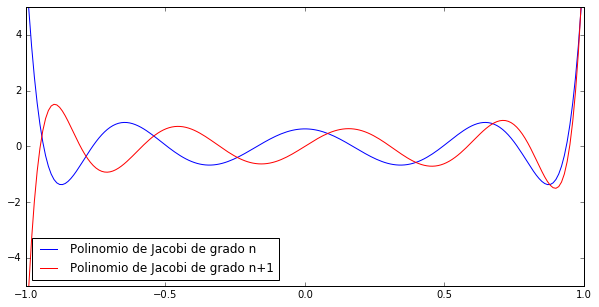

In [45]:
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -5, 5])
plt.plot(X2,YJ1,label="Polinomio de Jacobi de grado n")
plt.plot(X2,YJ2,"r",label="Polinomio de Jacobi de grado n+1")
plt.legend(loc='best', frameon=True)
plt.show()

Se muestra el valor de la integral numérica y el valor exacto que es cero.

In [57]:
m=m2
IT = (JACOBI(mt).subs({x:X2[0]})*(JACOBI(mt+1).subs({x:X2[0]}))+(JACOBI(mt).subs({x:X2[m-1]}))*(JACOBI(mt+1).subs({x:X2[m-1]})))*((X2[m-1]-X2[0])/(2*(m-1)))
for i in range (1,m-2):
    IT = IT + ((JACOBI(mt).subs({x:X2[i]}))*(JACOBI(mt+1).subs({x:X2[i]})))/(m-1)
IT,int(IT)

(-0.125033142028382, 0)

### 1.1.2 SIMPSON 1/3
#### Para aproximar el valor de la integral se usará la fórmula $IS=(b-a)\frac{f(x_0)+4\sum_{i=1,3,5,..}^{n-1}f(x_i)+2\sum_{j=2,4,6,...}^{n-2}f(x_j)+f(x_n)}{3n}$ para n+1 nodos equidistantes en el intervalo de $a=-1$ a $b=1$. 

Se muestra el valor de la integral numérica y el valor exacto que es cero.

In [58]:
IS = (JACOBI(ms).subs({x:X2[0]})*JACOBI(ms+1).subs({x:X2[0]})+JACOBI(ms).subs({x:X2[m-1]})*JACOBI(ms+1).subs({x:X2[m-1]}))*((X2[m-1]-X2[0])/(3*(m-1)))
for i in range(1,(m-1)/2):
    IS = IS + (4*JACOBI(ms).subs({x:X2[2*i-1]})*JACOBI(ms+1).subs({x:X2[2*i-1]}))*((X2[m-1]-X2[0])/(3*(m-1)))
for j in range (2,(m-1)/2):
    IS = IS + (2*JACOBI(ms).subs({x:X2[2*j-2]})*JACOBI(ms+1).subs({x:X2[2*j-2]}))*((X2[m-1]-X2[0])/(3*(m-1)))
IS, int(IS)

(-0.471690391125250, 0)

### 1.1.2 GAUSS

# TAREA 3 SOLUCIÓN DE ECUACIONES TRASCENDENTES

### 1.1 Elabórese el algoritmo de separación de ceros de su polinomio Pn (x)